<a href="https://colab.research.google.com/github/nishant-harinkhede12/Advanced-M-L-projects/blob/main/SentimentIntensityAnalyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [4]:
data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/amazon_alexa.tsv", delimiter='\t')
# print(data.head())
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


Data Visualization

In [9]:

ratings = data["rating"].value_counts()


In [10]:
ratings

5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64

In [11]:
numbers = ratings.index
numbers

Int64Index([5, 4, 1, 3, 2], dtype='int64')

In [13]:
quantity = ratings.values
quantity

array([2286,  455,  161,  152,   96])

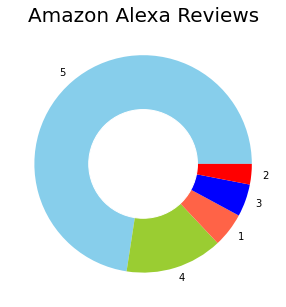

In [14]:
custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]
plt.figure(figsize=(5, 5))
plt.pie(quantity, labels=numbers, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Amazon Alexa Reviews", fontsize=20)
plt.show()

In [16]:
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["verified_reviews"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["verified_reviews"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["verified_reviews"]]
data.tail()

,rating,date,variation,verified_reviews,feedback,Positive,Negative,Neutral
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,0.380,0.000,0.620
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,0.000,0.000,1.000
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,0.237,0.028,0.735
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,0.087,0.087,0.827
3149,4,29-Jul-18,Black Dot,Good,1,1.000,0.000,0.000


In [17]:
def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")


In [18]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

sentiment_score(x, y, z)

Neutral 🙂 


In [19]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  1035.351999999999
Negative:  96.90099999999994
Neutral:  1936.7519999999954
